# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def forward_deriv(f, x, dx):
    return (f(x+dx) - f(x)) / dx

def central_deriv(f, x, dx):
    return (f(x+dx/2) - f(x-dx/2)) / dx

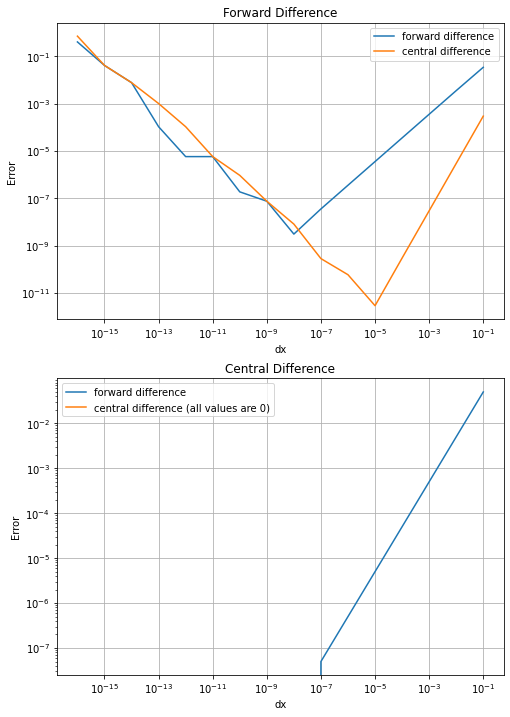

In [47]:
f = lambda x: np.cos(x)
f_deriv = lambda x: -np.sin(x)

dx_values = np.logspace(-16,-1,16)

fig, axs = plt.subplots(2, figsize=(8,12))

axs[0].plot(dx_values, abs(forward_deriv(f, np.pi/4, dx_values) - f_deriv(np.pi/4)), label='forward difference')
axs[0].plot(dx_values, abs(central_deriv(f, np.pi/4, dx_values) - f_deriv(np.pi/4)), label='central difference')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Forward Difference')
axs[0].set_xlabel('dx')
axs[0].set_ylabel('Error')
axs[0].grid()
axs[0].legend()

axs[1].plot(dx_values, abs(forward_deriv(f, 0, dx_values) - f_deriv(0)), label='forward difference')
axs[1].plot(dx_values, abs(central_deriv(f, 0, dx_values) - f_deriv(0)), label='central difference (all values are 0)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Central Difference')
axs[1].set_xlabel('dx')
axs[1].set_ylabel('Error')
axs[1].grid()
axs[1].legend()

Forward difference: Error&#126;$dx$ with optimal interval of $dx$&#126;10<sup>-7</sup><br>
Central difference: Error&#126;$dx^2$ with optimal interval of $dx$&#126;10<sup>-5</sup><br>
<br>
The central difference scheme is better since the error drops off more quickly as $dx$ decreases compared to the forward difference scheme. This can be shown theoretically using a taylor expansion of $y(x)$ and $y(x+h)$, solving for $y'$ in those taylor expansions and then plugging into the derivative formula definitions. In the forward difference scheme, the highest order term that remains is $h^2$ while the central difference scheme has $h$ as its highest order term. Also, in general, the central difference scheme is more accurate than the forward difference scheme for the same $h$ as the sampled points of the central difference scheme are half as far from the point of interest compared to the forward difference scheme. <br>
<br>
When we use $x=0$, the analytical derivative of $cos(x)$ is also zero. In the graph, the forward difference scheme shoots down out of view since it's rounding to zero at that point which is the analytical solution. The central difference can't be seen since it always gives the analytical solution of zero due to $cos$ being an even function. 